<a href="https://colab.research.google.com/github/SpiritSeal/CS2051-Research-Paper/blob/11-3-23-draft-presubmission/CS2051_Graph_Analysis_Algos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import networkx as nx
import random
import itertools
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
from typing import List

## Erdős-Rényi random graph algorithm

In [149]:
def erdos_renyi_graph(n, p):
    """
    Generate an Erdős-Rényi random graph.

    Parameters:
    - n: Number of nodes in the graph.
    - p: Probability of an edge existing between any pair of nodes (0 <= p <= 1).

    Returns:
    - A NetworkX graph object.
    """
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)

    for node1 in nodes:
        for node2 in nodes:
            if node1 < node2 and random.random() < p:
                G.add_edge(node1, node2)

    return G

Nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Edges: [(0, 6), (0, 9), (2, 3), (2, 6), (2, 9), (3, 5), (4, 5), (4, 7), (4, 8), (4, 9), (5, 9), (6, 7)]


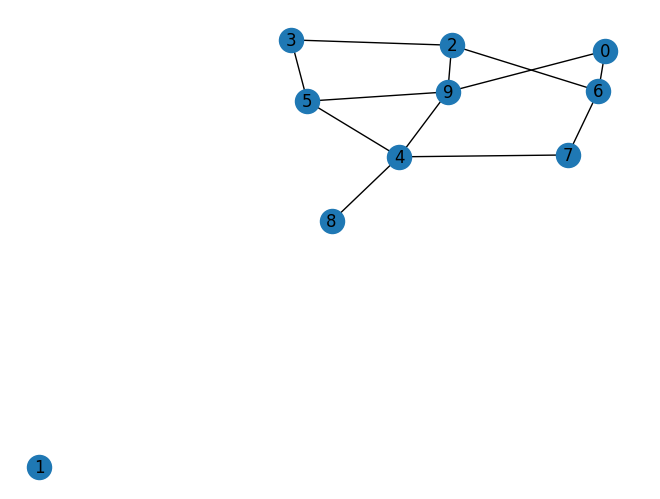

In [165]:
n = 10  # Number of nodes
p = 0.3  # Probability of an edge between nodes

er_graph = erdos_renyi_graph(n, p)

# Print the graph's nodes and edges
print("Nodes:", er_graph.nodes())
print("Edges:", er_graph.edges())

nx.draw(er_graph, with_labels=True)
plt.show()

# Generating an example graph to perform CPM, MM, and NNMF algorithms on

- While MM and NNMF garuntee at least one subgraph found as a result of their algorithm, CPM does not. As such, in order to more effectively showcase our work, we will generate example graphs using the above ER random graph generation algorithm until we get one that can be used to showcase a existant CPM.

### Hidden Helper Functions

In [151]:
def find_cliques(graph, k):
    cliques = [frozenset(clique) for clique in list(nx.find_cliques(graph)) if len(clique) >= k]
    return cliques

def clique_percolation(graph, k):
    cliques = find_cliques(graph, k)
    clique_set = set()

    for clique1 in cliques:
        for clique2 in cliques:
            if clique1 != clique2:
                if len(clique1.intersection(clique2)) >= (k - 1):
                    clique_set.add(clique1.union(clique2))

    return list(clique_set)
def generate_graph_with_cliques(param_n: int, param_p: float, param_k: int, max_attempts = 200) -> nx.classes.graph.Graph:
  test_cliques = []
  attempts = 0
  while(not test_cliques and attempts < max_attempts):
    test_graph = erdos_renyi_graph(param_n, param_p)
    test_cliques = clique_percolation(test_graph, k)
    attempts += 1
  return test_graph

### Graph Generator

In [152]:
# Generate a graph containing cliques
n = 10  # Number of nodes
p = 0.3  # Probability of an edge between nodes
k = 3  # Minimum clique size

clique_graph = generate_graph_with_cliques(n, p, k)

### Subgraph Visualization Helper Methods

In [153]:
# Function to visualize each clique in separate subplots
def visualize_subgraph_detatched(graph: nx.classes.graph.Graph, subgraphs: List[frozenset], subgraph_name="subgraph"):
    num_subgraphs = len(subgraphs)

    # Create a grid layout for subplots
    grid_layout = (1, num_subgraphs)

    # Create a figure and subplots
    fig, axes = plt.subplots(1, num_subgraphs, figsize=(15, 4))

    for i, subgraph in enumerate(subgraphs):
        sg = graph.subgraph(subgraph)
        try:
          ax = axes[i]
        except:
          ax = axes

        # Use the spring layout for better visualization
        pos = nx.spring_layout(sg)

        # Draw nodes and edges
        nx.draw(sg, pos, with_labels=True, node_color='skyblue', ax=ax)
        ax.set_title(f"{subgraph_name} {i+1}")

    plt.show()

In [154]:
def visualize_subgraph_contextualized(graph: nx.classes.graph.Graph, subgraphs: List[frozenset], subgraph_name="subgraph"):
  num_subgraphs = len(subgraphs)

  # Create a grid layout for subplots
  grid_layout = (1, num_subgraphs)

  # Create a figure and subplots
  fig, axes = plt.subplots(1, num_subgraphs, figsize=(15, 4))

  for i, subgraph in enumerate(subgraphs):
    # Create a shallow copy of the original graph to preserve the original structure
    colored_graph = graph.copy()
    try:
      ax = axes[i]
    except:
      ax = axes

    # Create a color mapping for nodes in the clique set
    color_map = {node: 'red' if node in subgraph else 'grey' for node in graph.nodes()}

    # Draw the graph with colored nodes
    pos = nx.spring_layout(colored_graph, seed=1)  # You can choose a different layout if needed
    nx.draw(colored_graph, pos, node_color=[color_map[node] for node in colored_graph.nodes()], with_labels=True, ax=ax)
    ax.set_title(f"{subgraph_name} {i+1}")
  plt.show()

## Clique Percolation Method

In [155]:
def find_cliques(graph, k):
    cliques = [frozenset(clique) for clique in list(nx.find_cliques(graph)) if len(clique) >= k]
    return cliques

def clique_percolation(graph, k):
    cliques = find_cliques(graph, k)
    clique_set = set()

    for clique1 in cliques:
        for clique2 in cliques:
            if clique1 != clique2:
                if len(clique1.intersection(clique2)) >= (k - 1):
                    clique_set.add(clique1.union(clique2))

    return list(clique_set)

In [156]:
def generate_graph_with_cliques(param_n: int, param_p: float, param_k: int, max_attempts = 200) -> nx.classes.graph.Graph:
  test_cliques = []
  attempts = 0
  while(not test_cliques and attempts < max_attempts):
    test_graph = erdos_renyi_graph(param_n, param_p)
    test_cliques = clique_percolation(test_graph, k)
    attempts += 1
  return test_graph

Graph with 10 nodes and 17 edges


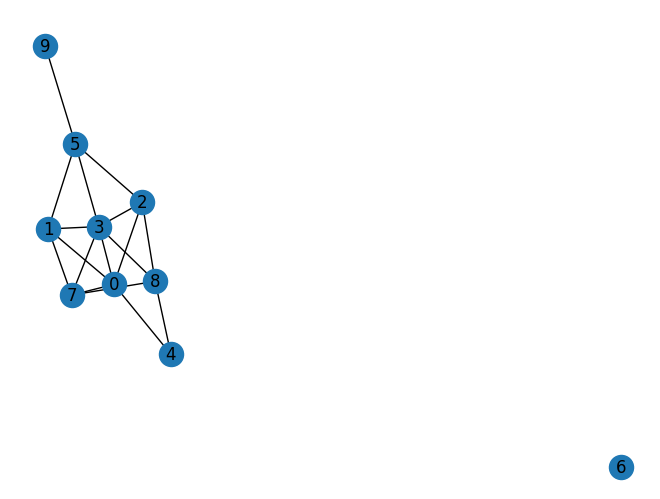

cliques: [frozenset({0, 1, 2, 3, 7}), frozenset({1, 2, 3, 5}), frozenset({0, 2, 3, 5}), frozenset({2, 3, 7, 8}), frozenset({0, 1, 3, 7, 8}), frozenset({0, 2, 3, 8}), frozenset({0, 1, 3, 5, 7}), frozenset({2, 3, 5, 8})]


In [157]:
# Generate a graph containing cliques
n = 10  # Number of nodes
p = 0.3  # Probability of an edge between nodes
k = 3  # Clique size

cliques = clique_percolation(clique_graph, k)

print(clique_graph)
nx.draw(clique_graph, with_labels=True)
plt.show()
print("cliques:", cliques)

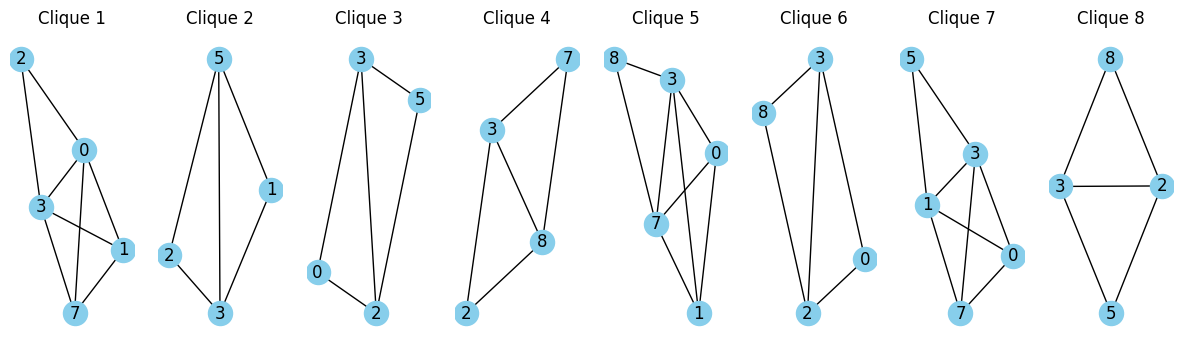

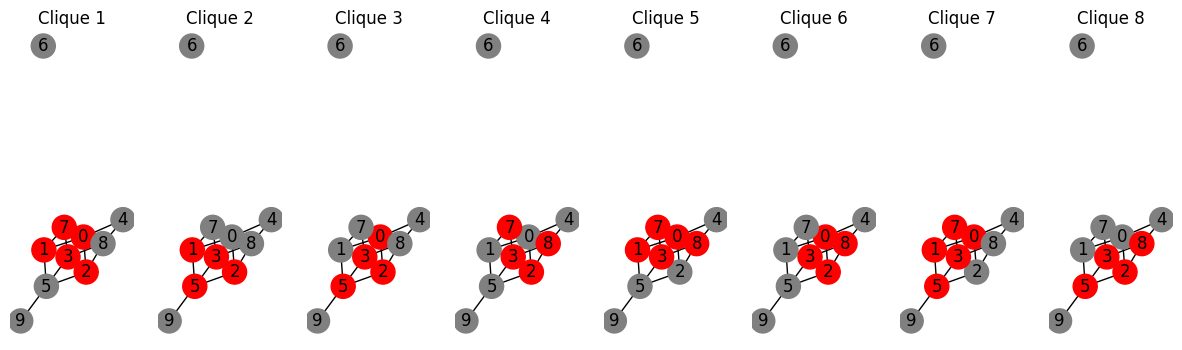

In [158]:
# Visualize the cliques
CPM_name = "Clique"
visualize_subgraph_detatched(clique_graph, cliques, CPM_name)
visualize_subgraph_contextualized(clique_graph, cliques, CPM_name)

## TODO: Modularity Maximization

We will be leveraging the implementation of this algorithm defined in the [`networkx`](https://networkx.org/) PyPI library.

In [159]:
# Get Modularity Maximization Communities
MM_communities = nx.community.greedy_modularity_communities(clique_graph)

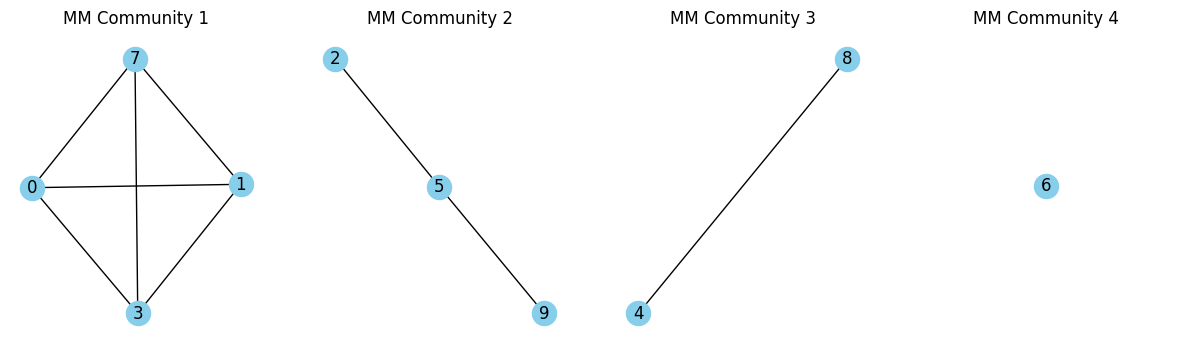

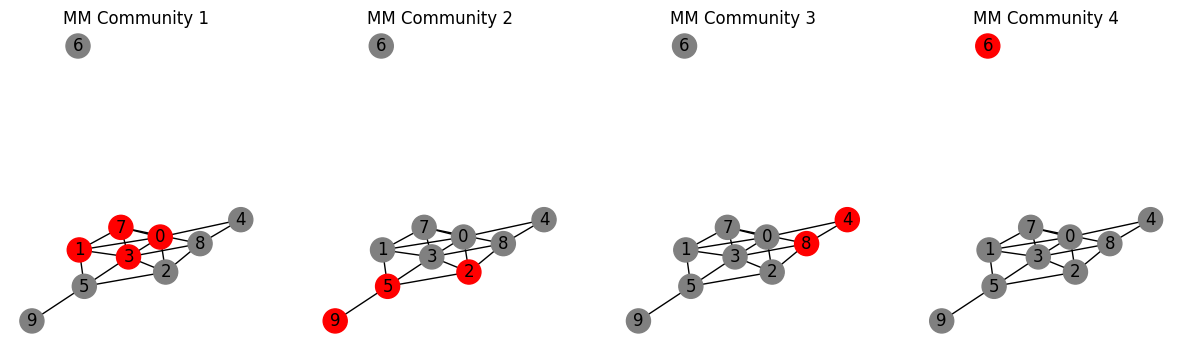

In [160]:
# Visualize Communities
MM_name = "MM Community"
visualize_subgraph_detatched(clique_graph, MM_communities, MM_name)
visualize_subgraph_contextualized(clique_graph, MM_communities, MM_name)

## TODO: Non-negative Matrix Factorization

In [161]:
# Extract the adjacency matrix
adjacency_matrix = nx.to_numpy_array(clique_graph)

# Apply NMF to identify community structures
n_components = 3  # Number of components (communities) to extractx``
model = NMF(n_components=n_components, init='random', random_state=0)
W = model.fit_transform(adjacency_matrix)
H = model.components_

# Turn the matrix of weights into a single List of Sets for use with our visualization API
component_set_list = [set() for i in range(n_components)]
for node_val, array in enumerate(W):
    max = 0
    for i in range(len(array)):
        if array[i] > array[max]:
            max = i
    component_set_list[max].add(node_val)

NMF_communities = [frozenset(i) for i in component_set_list]


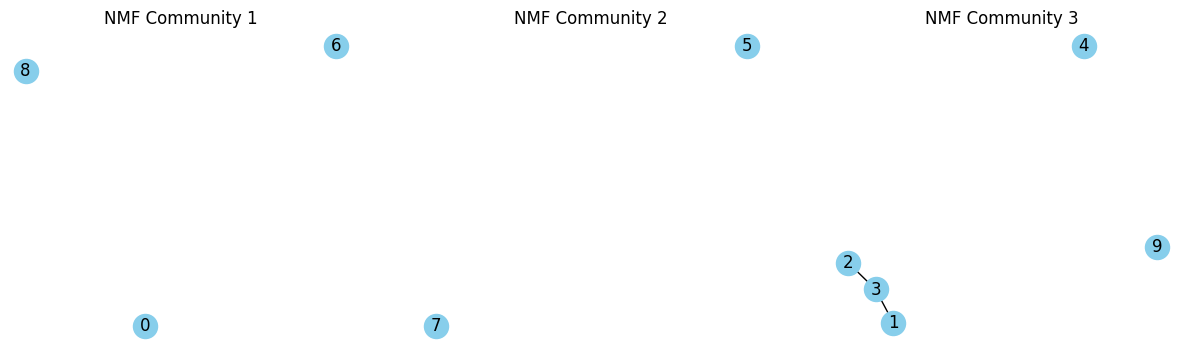

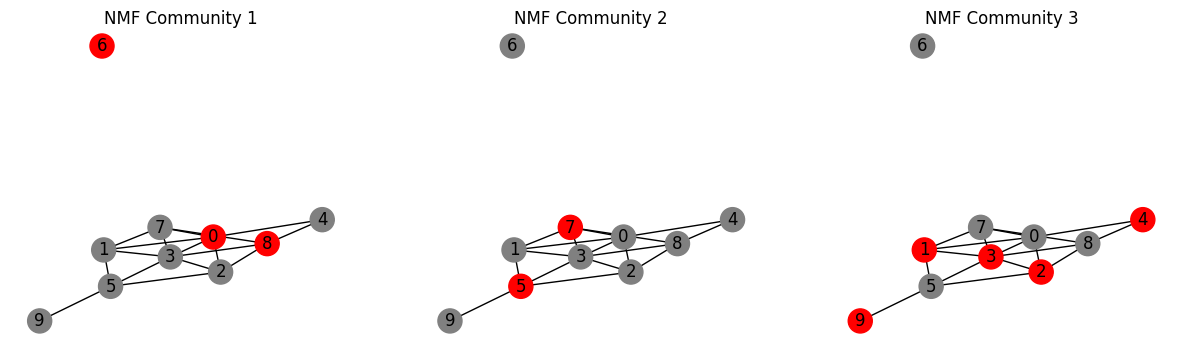

In [162]:
# Visualize components
NMF_name = "NMF Community"
visualize_subgraph_detatched(clique_graph, NMF_communities, NMF_name)
visualize_subgraph_contextualized(clique_graph, NMF_communities, NMF_name)